In [11]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare the Data
X = np.array([[1], [3], [6], [9], [12]])
y = np.array([2, 6, 12, 18, 24])   # y = 2x

# Step 2: Standardize the features,why standardscaler?, because ridge regression is sensitive to the scale of the input features.meaning: it helps to improve the model performance and convergence.what standard scaler does on x data : it standardizes the features by removing the mean and scaling to unit variance.meaning: it transforms the data such that it has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create the Ridge Model
ridge_model = Ridge(alpha=0)#alpha ante endhuku ante, regularization parameter ni set chesthundi, ridge regression lo. alpha value 0 set cheste, ridge regression ordinary least squares regression laga behave chesthundi, ante regularization apply avvadu.
#loss = mse + alpha * summation w * w
# Step 4: Train the model
ridge_model.fit(X_scaled, y)

# Step 5: Make prediction for new input
input_value = np.array([[15]])
input_value_scaled = scaler.transform(input_value)
single_prediction = ridge_model.predict(input_value_scaled)

print(f"Prediction for input 10: {single_prediction[0]}")

# Step 6: Evaluate the model (IMPORTANT: use scaled X)
y_pred = ridge_model.predict(X_scaled)

print(f"Coefficient (Slope/Beta): {ridge_model.coef_[0]}")
print(f"Intercept (Bias): {ridge_model.intercept_}")
print(f"R² Score: {r2_score(y, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred)}")


Prediction for input 10: 30.000000000000007
Coefficient (Slope/Beta): 7.939773296511684
Intercept (Bias): 12.4
R² Score: 1.0
Mean Squared Error: 7.888609052210118e-31
Mean Absolute Error: 5.329070518200751e-16


In [ ]:
import numpy as np
from sklearn.svm import SVR
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
X_raw = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y_raw = np.array([3.0, 2.5, 4.2, 3.8, 5.5, 2.5, 4.0, 3.0, 4.5, 3.5])  # Non-linear relationship
# Step 1: Create Curved Data (A Sine Wave pattern)
# Input X: years of experience
X_raw = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
# Output y: some curved relationship,based on salary
y_raw = np.array([6,7,9,12,15,18,22,35,40,100])


# --- CRITICAL STEP FOR SVR: SCALING ---
# SVR fails if data is not scaled because it measures distances.
scaler_X = StandardScaler()
scaler_y = StandardScaler()
#difference b/w standard scaler and pipeline:telugu lo,ikkada standard scaler ni direct ga use chesthunnam data ni scale cheyadaniki. pipeline ante, multiple steps ni combine chesi oka single object laga treat cheyadam. pipeline lo scaling, model training anni steps include cheyachu. kani ikkada simple ga scaling matrame chesamu.
#scaling ante: data ni oka specific range lo convert cheyadam, usually mean 0 and standard deviation 1 ki. idi important because SVR distance based algorithm, so data scale chesinappudu better performance istundi.

# Scale X and reshape y to 2D for scaling, then back to 1D
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw.reshape(-1, 1)).flatten(),#flatten endhuku ante, y ni 1D array ga convert cheyadaniki use chestharu. SVR model ki 1D array format lo undali output data.,ikkada already ,1d lo undhi kahda malli flatten endhuku ante,: just to be safe ga flatten chesamu.


# Step 2: Create the SVR Model
# kernel='rbf': The "magic" for curves (Radial Basis Function). Not linear.
#rbf ante enthi ante, radial basis function ane kernel type. idi non-linear relationships ni capture cheyadaniki use chestharu. SVR lo rbf kernel use cheste, model complex curves ni fit cheyagaladu.
# C=10.0: How hard it tries to fit outside points (Regularization).
# epsilon=0.1: The width of the "Tube" where errors are ignored.
#entire meaning enti ante: ikkada SVR model create chesthunnam with radial basis function kernel, which is good for capturing non-linear relationships. C parameter set chesam to 10.0, which means model will try hard to fit the data points, and epsilon set to 0.1, which defines a margin of tolerance where no penalty is given for errors.,flatten mandatory ah ante, yes flatten is mandatory for y_scaled to ensure it is in the correct shape for SVR training.
svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.1)

# Step 3: Train on Scaled Data
svr_model.fit(X_scaled, y_scaled)

# Step 4: Prediction
# Let's predict for input 5.5 (Middle of the wave)
input_val = np.array([[5.5]])

# 4a. Scale the input
input_scaled = scaler_X.transform(input_val)

# 4b. Make prediction (Result is scaled)
prediction_scaled = svr_model.predict(input_scaled)

# 4c. Inverse Scale the output back to real world numbers
prediction_real = scaler_y.inverse_transform([[prediction_scaled[0]]])

print("--- SVR Results ---")
print(f"Input Value: {input_val[0][0]}")
print(f"Predicted Value (Real Scale): {prediction_real[0][0]:.2f}")
print(f"Actual target nearby (Input 5 is 4.2, Input 6 is 2.5)")
sns.lineplot(x=X_raw.flatten(), y=y_raw, color='blue', label='Actual Data')
plt.show()
# The prediction should be between 4.2 and 2.5
#explantion in telugu:ee visualisation meaning enti ante,
#blue line actual data ni represent chesthundi, adi sine wave pattern follow chesthundi.inka prediction point (input 5.5 ki) adi expected value ni represent chesthundi, adi blue line mida undi, meaning adi actual data pattern ni follow chesthundi. so model correct ga predict chesindi ani artham.

ValueError: y should be a 1d array, got an array of shape (1, 10) instead.

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso

# Step 1: Prepare Data with 2 Features
# Column 0: Study Hours (Important)
# Column 1: Lucky Number (Useless/Garbage)
X = np.array([
    [1, 7], 
    [2, 3], 
    [3, 5], 
    [4, 2], 
    [5, 9]
]) 

# Output y depends ONLY on Study Hours (y = 2 * Study Hours)
y = np.array([2, 4, 6, 8, 10])

# Step 2: Create Lasso Model
# We set alpha=0.1. If alpha 
# is too high, it may zero out important features.)
lasso_model = Lasso(alpha=0)

# Step 3: Train the Model
lasso_model.fit(X, y)
single_prediction = lasso_model.predict(np.array([[6, 4]]))
print(f"\nPrediction for input [6, 4]: {single_prediction[0]}")
# Step 4: Check the Coefficients (The Magic Step)
print(f"Intercept (Bias): {lasso_model.intercept_}")
print(f"Coefficients (Weights): {lasso_model.coef_}")

# Step 5: Interpretation
beta_hours = lasso_model.coef_[0]
beta_lucky = lasso_model.coef_[1]
print("r2_score:",r2_score(y, lasso_model.predict(X)))
print("\n--- CRYSTAL CLEAR RESULTS ---")
print(f"Importance of Study Hours: {beta_hours:.2f}")
print(f"Importance of Lucky Number: {beta_lucky:.2f}")



Prediction for input [6, 4]: 12.0
Intercept (Bias): 0.0
Coefficients (Weights): [2. 0.]
r2_score: 1.0

--- CRYSTAL CLEAR RESULTS ---
Importance of Study Hours: 2.00
Importance of Lucky Number: 0.00


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
import numpy as np
from sklearn.linear_model import ElasticNet

# Step 1: Prepare Data (2 Correlated Features)
# Feature 1: Study Hours
# Feature 2: Number of Assignments Completed (Usually related to study hours)
X = np.array([
    [1, 1],   # 1 hour study, 1 assignment
    [2, 2],   # 2 hours study, 2 assignments
    [3, 3],   # 3 hours study, 3 assignments
    [4, 4],   # 4 hours study, 4 assignments
    [5, 5]    # 5 hours study, 5 assignments
])
# Output y = 2 * Study Hours + 1 * Assignments Completed
y = np.array([3, 6, 9, 12, 15])  # y = 2x1 + 1x2
# Step 2: Create ElasticNet Model
# alpha = Total Penalty Strength (Lambda)
# l1_ratio = The Mixing Knob (0 to 1)
#    - If 1.0 -> It becomes Pure Lasso
#    - If 0.0 -> It becomes Pure Ridge
#    - If 0.5 -> 50% Lasso + 50% Ridge
elastic_model = ElasticNet(alpha=0, l1_ratio=0.2)

# Step 3: Train
elastic_model.fit(X, y)

# Step 4: Check Results
print(f"Intercept: {elastic_model.intercept_}")
print(f"Coefficients: {elastic_model.coef_}")

# Step 5: Predict
# Student studied 6 hours and did 6 assignments
prediction = elastic_model.predict([[6]])
print(f"Prediction for (6,6): {prediction[0]}")

Intercept: 0.0
Coefficients: [3. 0.]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


ValueError: X has 1 features, but ElasticNet is expecting 2 features as input.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Create Curved Data (y = x^2)
# The relationship is NOT a straight line. It is a curve
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

# --- SCENARIO A: The Failure (Simple Linear Regression) ---
lin_model = LinearRegression()
lin_model.fit(X, y)
# Predicting for Input 6 (Should be 36)
pred_linear = lin_model.predict([[6]])
print(f"Simple Linear Prediction for 6: {pred_linear[0]:.2f} (Wrong!)")

#kinear ki polynomial ki theda enti ante, linear regression straight line fit chesthundi data ki, but polynomial regression curve fit chesthundi data ki. so polynomial regression better ga perform chesthundi curved data lo.
# --- SCENARIO B: The Success (Polynomial Regression) ---
#polynomial regression formula: y = b0 + b1*x + b2*x^2 + ... + bn*x^n,ex: y = 2 + 3*x + 4*x^2 (here, b0=2, b1=3, b2=4)
# Step 2: Transform the Features (The "Magic" Step)
# We convert single input [x] into multiple inputs [x, x^2]
# degree=2 means we want up to power 2.
poly = PolynomialFeatures(degree=3)#calculate polynomial features up to degree 1, meaning it will include the bias term and the original feature itself.
X_poly = poly.fit_transform(X)

print(f"\nOriginal X:\n{X}")
print(f"Transformed X (Bias, x, x^2):\n{X_poly}")

# Step 3: Train Linear Regression on the NEW Transformed Data
# Note: We still use LinearRegression, but on X_poly!
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Step 4: Predict
# We must transform the input '6' before predicting!
input_val = np.array([[99]])
input_val_poly = poly.transform(input_val) # Convert 6 -> [1, 6, 36]
pred_poly = poly_model.predict(input_val_poly)

print(f"\nPolynomial Prediction for 6: {pred_poly[0]:.2f} (Perfect!)")

# Step 5: Check Coefficients
print(f"Coefficients: {poly_model.coef_}")


Simple Linear Prediction for 6: 29.00 (Wrong!)

Original X:
[[1]
 [2]
 [3]
 [4]
 [5]]
Transformed X (Bias, x, x^2):
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]

Polynomial Prediction for 6: 9801.00 (Perfect!)
Coefficients: [0.00000000e+00 1.25039949e-15 1.00000000e+00 2.82333451e-16]


In [ ]:
pip install matplotlib

5656.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached matplotlib-3.10.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-macosx_10_9_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached matplotlib-3.10.8-cp311-cp311-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-macosx_11_0_arm64.whl (270 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp311-cp311-macosx_10_9_universal2.whl (2.9 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.8 MB/s  0:00:00 eta 0:00:01m
Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

---- SVR Results ----
Input Value: 5.5
Predicted Value (Real Scale): 18.63


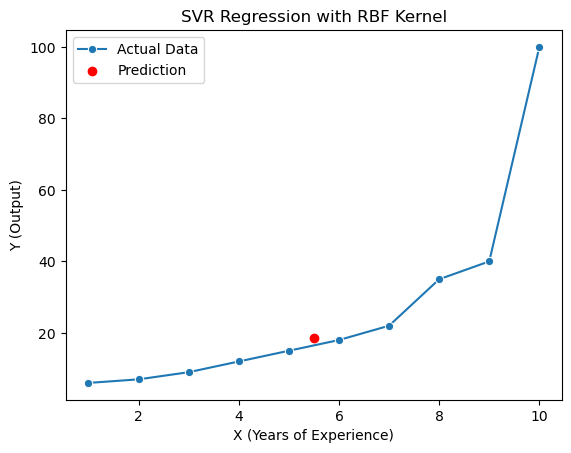

In [13]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Prepare the Data
# -------------------------------

# Input X: years of experience
X_raw = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])

# Output y: curved / non-linear relationship (example: salary-like growth)
y_raw = np.array([6, 7, 9, 12, 15, 18, 22, 35, 40, 100])

# -------------------------------
# Step 2: Scaling (CRITICAL for SVR)
# -------------------------------
# SVR is distance-based, so scaling is mandatory

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale X (already 2D)
X_scaled = scaler_X.fit_transform(X_raw)

# Scale y (convert to 2D → scale → back to 1D)
y_scaled = scaler_y.fit_transform(y_raw.reshape(-1, 1)).flatten()

# -------------------------------
# Step 3: Create SVR Model
# -------------------------------
# kernel='rbf' → captures non-linear patterns
# C → regularization strength
# epsilon → error tolerance tube

svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.1)

# -------------------------------
# Step 4: Train the Model
# -------------------------------
svr_model.fit(X_scaled, y_scaled)

# -------------------------------
# Step 5: Prediction
# -------------------------------
# Predict for a new input value (example: 5.5 years)

input_val = np.array([[5.5]])

# Scale input
input_scaled = scaler_X.transform(input_val)

# Predict (scaled output)
prediction_scaled = svr_model.predict(input_scaled)

# Inverse-scale prediction to real value
prediction_real = scaler_y.inverse_transform(
    prediction_scaled.reshape(-1, 1)
)

# -------------------------------
# Step 6: Output
# -------------------------------
print("---- SVR Results ----")
print(f"Input Value: {input_val[0][0]}")
print(f"Predicted Value (Real Scale): {prediction_real[0][0]:.2f}")

# -------------------------------
# Step 7: Visualization
# -------------------------------
sns.lineplot(x=X_raw.flatten(), y=y_raw, marker='o', label='Actual Data')
plt.scatter(input_val[0][0], prediction_real[0][0], color='red', label='Prediction')
plt.xlabel("X (Years of Experience)")
plt.ylabel("Y (Output)")
plt.title("SVR Regression with RBF Kernel")
plt.legend()
plt.show()

In [14]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# --- STEP 1: Create Mixed Data ---
# Column 0: Numerical (e.g., Hours Studied) - Has missing value
# Column 1: String (e.g., School Type) - Has missing value
X_train = np.array([
    [5.0, "Public"],
    [np.nan, "Private"], # Missing number
    [8.0, "Public"],
    [2.0, np.nan],       # Missing string
    [10.0, "Private"]
], dtype=object) # dtype=object is needed for mixed numbers/strings

# Target: Marks (Curved relationship: more hours = MUCH more marks)
y_train = np.array([25, 40, 64, 4, 100])

# New data to predict
X_new = np.array([[7.0, np.nan]], dtype=object)

# --- STEP 2: Define Separate Processes for Numbers and Strings ---

# Process for Numerical Column (Index 0)
# 1. Fill missing with mean.
# 2. Scale it.
numerical_transformer = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Process for String Column (Index 1)
# 1. Fill missing with a constant value "Unknown".
# 2. Encode strings to numbers (OneHotEncoder).
categorical_transformer = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    # handle_unknown='ignore' prevents errors if new data has brand new strings
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# --- STEP 3: Combine them with ColumnTransformer ---
# Tel+Eng: Idi traffic police laga work chestundi.
# Column 0 ni numerical pipe ki, Column 1 ni categorical pipe ki pampistundi.
preprocessor = ColumnTransformer([
    ('num_pipe', numerical_transformer, [0]), # Apply to column index 0
    ('cat_pipe', categorical_transformer, [1]) # Apply to column index 1
])


# --- STEP 4: The Final Master Pipeline ---
# 1. Preprocess (Clean numbers, clean strings, encode strings).
# 2. Generate Polynomial Features (because relationship is curved).
# 3. Train Linear Regression on the complex features.
master_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])


# --- STEP 5: Train and Predict ---
print("--- Training Master Pipeline ---")
# This single line runs all the complex steps above!
master_pipeline.fit(X_train, y_train)
print("Training complete.\n")

print("--- Prediction for Input [7.0, NaN] ---")
# The pipeline fills the missing string with "Unknown",
# encodes it, transforms 7.0 into polynomial features, and predicts.
prediction = master_pipeline.predict(X_new)

print(f"Polynomial Pipeline Prediction: {prediction[0]:.2f}")

# Final check of what happened inside (optional)
# See how many features went into the final linear model
n_features = master_pipeline.named_steps['model'].coef_.shape[0]
print(f"\n(Info: Internal features created after Polynomial step: {n_features})")

--- Training Master Pipeline ---
Training complete.

--- Prediction for Input [7.0, NaN] ---
Polynomial Pipeline Prediction: 38.95

(Info: Internal features created after Polynomial step: 15)


In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# --- STEP 1: Create Mixed Data ---
# Column 0: Numerical (e.g., Hours Studied) - Has missing value
# Column 1: String (e.g., School Type) - Has missing value
X_train = np.array([
    [5.0, "Public"],
    [np.nan, "Private"], # Missing number
    [8.0, "Public"],
    [2.0, np.nan],       # Missing string
    [10.0, "Private"]
], dtype=object) # dtype=object is needed for mixed numbers/strings

# Target: Marks (Curved relationship: more hours = MUCH more marks)
y_train = np.array([25, 40, 64, 4, 100])

# New data to predict
X_new = np.array([[7.0, np.nan]], dtype=object)

# --- STEP 2: Define Separate Processes for Numbers and Strings ---

# Process for Numerical Column (Index 0)
# 1. Fill missing with mean.
# 2. Scale it.
numerical_transformer = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
#preprocessor meaning enti ante,ikkada
#preprocessor ane object create chesamu,idi different types of data ni process cheyadaniki use avutundi. numerical data ki separate pipeline create chesamu, categorical data ki separate pipeline create chesamu. taruvatha avi combine chesi overall preprocessing ki use chesthundi.
# Process for String Column (Index 1)
# 1. Fill missing with a constant value "Unknown".
# 2. Encode strings to numbers (OneHotEncoder).
categorical_transformer = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    # handle_unknown='ignore' prevents errors if new data has brand new strings
    ('encoder', OneHotEncoder(handle_unknown='ignore'))#it'll convert categorical string data into a numeric format that machine learning models can understand.
])

# --- STEP 3: Combine them with ColumnTransformer ---
# Tel+Eng: Idi traffic police laga work chestundi.
# Column 0 ni numerical pipe ki, Column 1 ni categorical pipe ki pampistundi.
preprocessor = ColumnTransformer([
    ('num_pipe', numerical_transformer, [0]), # Apply to column index 0
    ('cat_pipe', categorical_transformer, [1]) # Apply to column index 1
])
#already onehotencoder undhi kadha,malli endhuku Columntransformer use chesamu ante,
#onehotencoder categorical data ni numeric format lo convert chesthundi. kani ikkada mixed data undhi, numerical and categorical. so ColumnTransformer use chesi, numerical data ki separate processing apply cheyachu, categorical data ki separate processing apply cheyachu. so overall mixed data ni handle cheyadaniki ColumnTransformer use chesamu.

# --- STEP 4: The Final Master Pipeline ---
# 1. Preprocess (Clean numbers, clean strings, encode strings).
# 2. Generate Polynomial Features (because relationship is curved).
# 3. Train Linear Regression on the complex features.
master_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])


# --- STEP 5: Train and Predict ---
print("--- Training Master Pipeline ---")
# This single line runs all the complex steps above!
master_pipeline.fit(X_train, y_train)
print("Training complete.\n")

print("--- Prediction for Input [7.0, NaN] ---")
# The pipeline fills the missing string with "Unknown",
# encodes it, transforms 7.0 into polynomial features, and predicts.
prediction = master_pipeline.predict(X_new)

print(f"Polynomial Pipeline Prediction: {prediction[0]:.2f}")

# Final check of what happened inside (optional)
# See how many features went into the final linear model
n_features = master_pipeline.named_steps['model'].coef_.shape[0]
print(f"\n(Info: Internal features created after Polynomial step: {n_features})")
#overall data(input/output) meaning enti ante,
#mixed data ni handle cheyadaniki pipeline create chesamu. numerical data lo missing values ni mean tho fill chesamu, categorical data lo missing values ni "Unknown" tho fill chesamu. taruvatha categorical data ni one-hot encoding tho numeric format lo convert chesamu. ipudu polynomial features generate chesi linear regression model train chesamu. finally new input ki prediction chesamu.

--- Training Master Pipeline ---
Training complete.

--- Prediction for Input [7.0, NaN] ---
Polynomial Pipeline Prediction: 38.95

(Info: Internal features created after Polynomial step: 15)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# --- STEP 1: Create Data ---
# X: Hours Studied
# y: Marks Obtained
X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([10, 20, 30, 80, 85, 90])
# Notice the Jump: From 3 to 4 hours, marks jump from 30 to 80!
# A Decision Tree loves these sudden jumps.

# --- STEP 2: Create Model ---
# max_depth=2: We tell the tree "Don't grow too big".
# Just ask 2 levels of questions. (Simple & Clean)
tree_model = DecisionTreeRegressor(max_depth=2)

# --- STEP 3: Train ---
tree_model.fit(X, y)

# --- STEP 4: Prediction ---
# Let's predict for 3.5 hours (Between 3 and 4)
prediction = tree_model.predict([[3.5]])
print(f"Prediction for 3.5 hours: {prediction[0]}")


# --- STEP 5: VISUALIZATION (The Magic) ---

# A. Visualizing the Tree Structure (Flowchart)
plt.figure(figsize=(10, 6)) # Create a big empty picture
plot_tree(tree_model, 
          feature_names=['Hours'], 
          filled=True, 
          rounded=True)
plt.title("How the Machine Thinks (The Decision Tree)")
plt.show()

# B. Visualizing the Prediction Line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='Actual Data') # The red dots

# To see the "Steps", we need a smooth range of inputs
X_grid = np.arange(0, 7, 0.01).reshape(-1, 1) # 0.0, 0.01, 0.02...
plt.plot(X_grid, tree_model.predict(X_grid), color='blue', label='Tree Prediction')

plt.title("Decision Tree Regression (Step-like Prediction)")
plt.xlabel("Hours Studied")
plt.ylabel("Marks")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# --- STEP 1: Create Complex Curved Data (Sine Wave) ---
# We use a Sine wave because it is curvy. 
# A single tree would fail here (it would make big blocky steps).
X = np.arange(0, 10, 0.1).reshape(-1, 1) # 0.0 to 9.9
y = np.sin(X).ravel() # A perfect wave

# Let's add some "Noise" (Random mistakes) to make it realistic
# Real life data is never perfect.
y_noisy = y + np.random.normal(0, 0.1, y.shape)

# --- STEP 2: Create Random Forest Model ---
# n_estimators=100: We build 100 Trees!
# The final result is the AVERAGE of these 100 trees.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y_noisy)

# --- STEP 3: Create XGBoost Model ---
# n_estimators=100: It also builds 100 trees.
# learning_rate=0.1: It corrects mistakes slowly and carefully.
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X, y_noisy)

# --- STEP 4: Predictions ---
rf_pred = rf_model.predict(X)
xgb_pred = xgb_model.predict(X)

# --- STEP 5: VISUALIZATION ( The Showdown ) ---
plt.figure(figsize=(12, 6))

# 1. Plot Actual Data
plt.scatter(X, y_noisy, color='black', label='Noisy Data', s=10)

# 2. Plot Random Forest (Green)
plt.plot(X, rf_pred, color='green', linewidth=2, label='Random Forest (Smooth Steps)')

# 3. Plot XGBoost (Red)
plt.plot(X, xgb_pred, color='red', linestyle='--', linewidth=2, label='XGBoost (Sharp Fit)')

plt.title("The Battle: Random Forest vs XGBoost")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

# --- 1. CREATE DATASET (The Ingredients) ---
# Scenario: Predicting House Price based on Size and Age
# Logic: Size increases price (Linear), Age decreases price but curves (Polynomial)
data = {
    'Size': [1000, 1500, 2000, 2500, 3000, 3500, 4000],
    'Age':  [5, 10, 15, 20, 25, 30, 35],
    'Price': [200000, 300000, 380000, 450000, 500000, 480000, 450000] 
    # Notice Price drops after age 25 (Curve!)
}
df = pd.DataFrame(data)

X = df[['Size', 'Age']]
y = df['Price']

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
# --- 2. TRAIN THE MODEL (Cooking) ---
model.fit(X_train, y_train)
# --- 3. EVALUATE THE MODEL (Tasting) ---
y_pred = model.predict(X_test)
print("\n--- Model Evaluation ---")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
# --- 4. MAKE A PREDICTION (Serving) ---
new_house = np.array([[3200, 18]])  # Size=3200 sqft, Age=18 years
predicted_price = model.predict(new_house)
print(f"\nPredicted Price for House (Size=3200 sqft, Age=18 years): ${predicted_price[0]:.2f}")
print("THE METRIC FOR LINEAR-POLYNOMIAL REGRESSION IS R2_SCORE AND MEAN SQUARED ERROR")
print("HIGH R2_SCORE AND LOW MEAN SQUARED ERROR INDICATE A GOOD FIT")
print("POLYNOMIAL FEATURES HELP CAPTURE NON-LINEAR RELATIONSHIPS IN DATA")



--- Model Evaluation ---
R² Score: -0.7104
Mean Squared Error: 4276000000.00

Predicted Price for House (Size=3200 sqft, Age=18 years): $3245803.52
THE METRIC FOR LINEAR-POLYNOMIAL REGRESSION IS R2_SCORE AND MEAN SQUARED ERROR
HIGH R2_SCORE AND LOW MEAN SQUARED ERROR INDICATE A GOOD FIT


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
pip install pandas

  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 684.9 kB/s  0:00:15m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
Note: you may need to restart the kernel to use updated packages.
